**INTRODUCTION:**
This project focuses on the challenge faced by insurance companies in determining the appropriate costs for health insurance.

By employing data analysis and machine learning techniques, we aim to develop a predictive model that can estimate health insurance costs effectively.

Our analysis will consider factors such as age, family size, and other relevant variables to provide insights for pricing health insurance plans for individuals and families.

By utilizing collected data and advanced data science methods, this project aims to support insurance companies in making informed decisions and offering fair and accurate health insurance pricing for potential customers.






**Importing requried libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Collection & Analysis**

In [2]:
# loading the data from Excel file to a Pandas DataFrame
health_dataset=pd.read_excel("Health_insurance_cost.xlsx")

In [3]:
# first 5 rows of the dataframe
health_dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
health_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
health_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
health_dataset.dtypes       # data types of columns

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [7]:
# checking for missing values
health_dataset.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

There are missing values present in few columns.

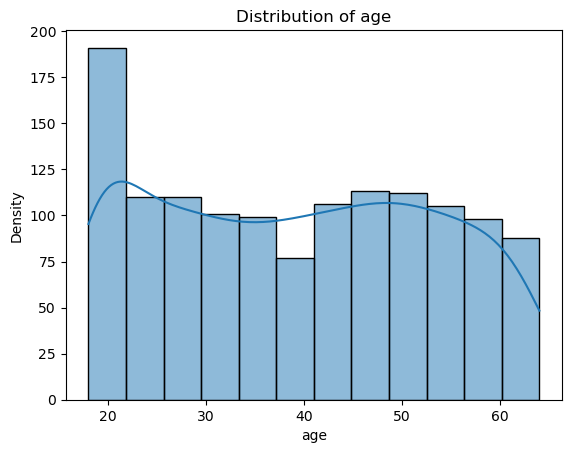

In [8]:
sns.histplot(health_dataset['age'], kde=True)
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Distribution of age')
plt.show()


In [9]:
mean_age=health_dataset["age"].mean()
health_dataset["age"].fillna(mean_age,inplace=True)

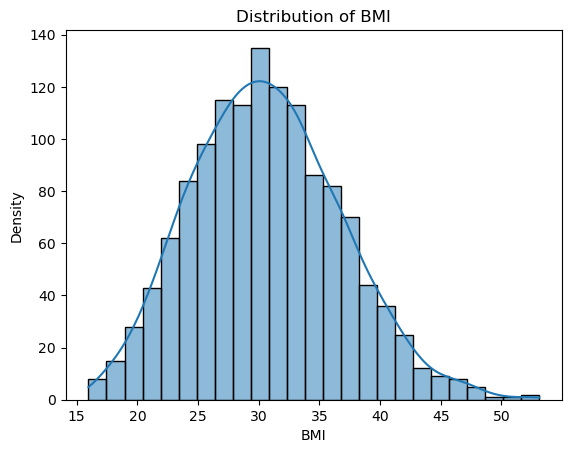

In [10]:
sns.histplot(health_dataset['BMI'], kde=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI')
plt.show()

In [11]:
mean_BMI=health_dataset["BMI"].mean()
health_dataset["BMI"].fillna(mean_BMI,inplace=True)

In [12]:
health_dataset.dropna(subset=['health_insurance_price'], inplace=True)

The dataset contained missing values in the "age" and "BMI" columns.
Since the distribution of these columns was found to be normal, the missing values were filled with the respective column means using the "fillna()" function.
Furthermore, the two missing values in the "health_insurance_price" column were dropped using the "dropna()" function to maintain the dataset's completeness.






In [13]:
health_dataset.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

**Data Analysis**

In [14]:
# statistical Measures of the dataset
health_dataset.describe()

,age,BMI,Children,health_insurance_price
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164416,30.631279,1.094311,13268.527719
std,13.915466,6.052198,1.206138,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4744.325050
50%,39.166412,30.495000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


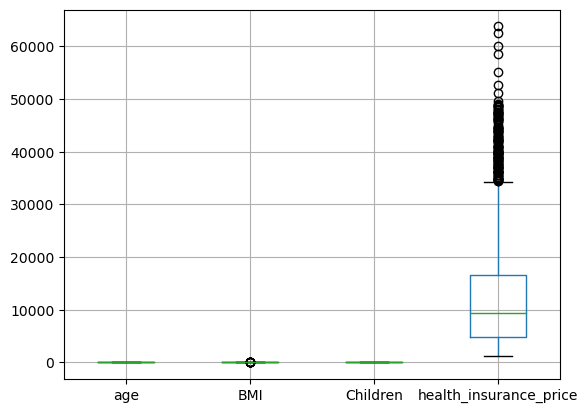

In [15]:
health_dataset.boxplot()
plt.show()

In [16]:
IQR=health_dataset.BMI.quantile(0.75)-health_dataset.BMI.quantile(0.25)

lower_value=health_dataset.BMI.quantile(0.25)-(IQR*1.5)
upper_value=health_dataset.BMI.quantile(0.75)+(IQR*1.5)

print(lower_value)
print(upper_value)

14.142500000000004
46.6025


In [17]:
mean_value=health_dataset["BMI"].mean()
mean_value

30.63127918023269

In [18]:
health_dataset["BMI"] = np.where((health_dataset["BMI"] >= upper_value) & (health_dataset["BMI"] <= lower_value),
                                 mean_value, health_dataset["BMI"])


The "BMI" and "Health Insurance" columns contain outliers.
For the "BMI" column, I addressed these outliers by imputing them with the mean value of that specific column.






**univariate analysis**

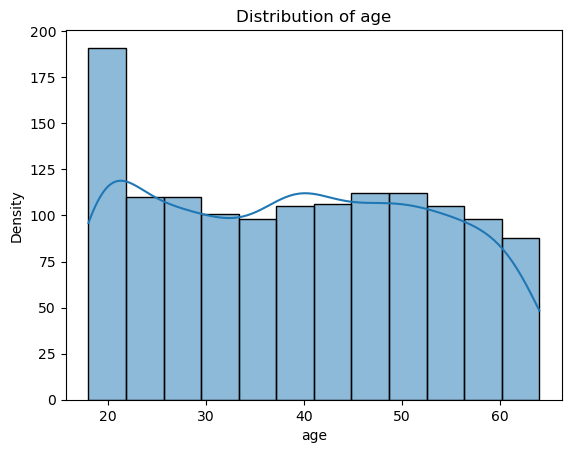

In [19]:
sns.histplot(health_dataset['age'], kde=True)
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Distribution of age')
plt.show()

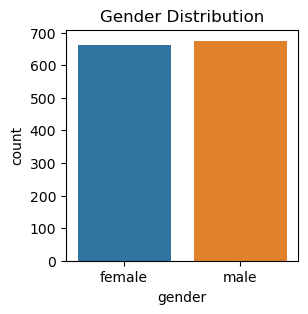

In [20]:
# Gender column
plt.figure(figsize=(3,3))
sns.countplot(x='gender', data=health_dataset)
plt.title('Gender Distribution')
plt.show()

The dataset contains a nearly equal number of male and female individuals.

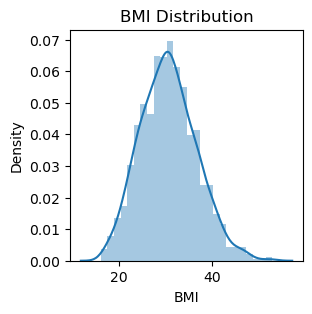

In [21]:
# bmi distribution
plt.figure(figsize=(3,3))
sns.distplot(health_dataset['BMI'])
plt.title('BMI Distribution')
plt.show()

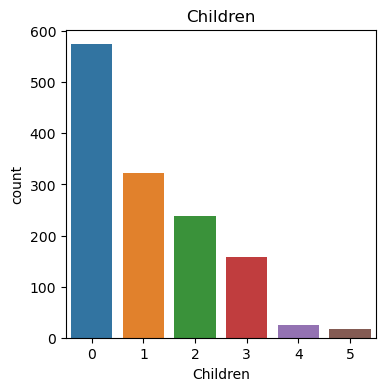

In [22]:
# children column
plt.figure(figsize=(4,4))
sns.countplot(x='Children', data=health_dataset)
plt.title('Children')
plt.show()

Families without any children tend to have a relatively high representation in the dataset.

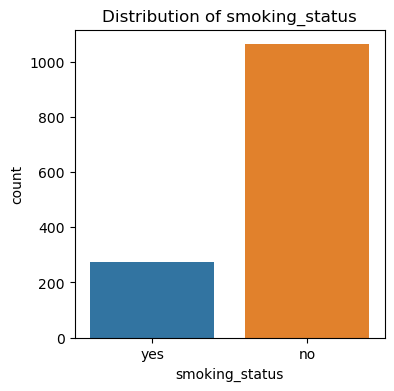

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoking_status', data=health_dataset)
plt.title('Distribution of smoking_status')
plt.show()

From this graph, it's clear that in our dataset, there are more non-smokers than smokers.

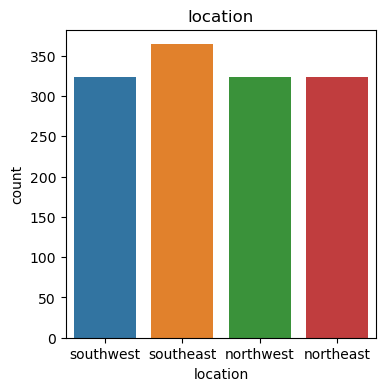

In [24]:
# location column
plt.figure(figsize=(4,4))
sns.countplot(x='location', data=health_dataset)
plt.title('location')
plt.show()

From this bar plot, we can conclude that the Southeast location has a higher count.

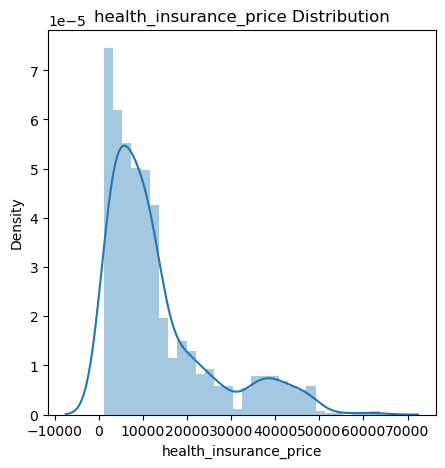

In [25]:
# distribution of price value
plt.figure(figsize=(5,5))
sns.distplot(health_dataset['health_insurance_price'])
plt.title('health_insurance_price Distribution')
plt.show()

It's evident that the 'Health Insurance Price' column is right-skewed.

**Bivariate Analysis.**

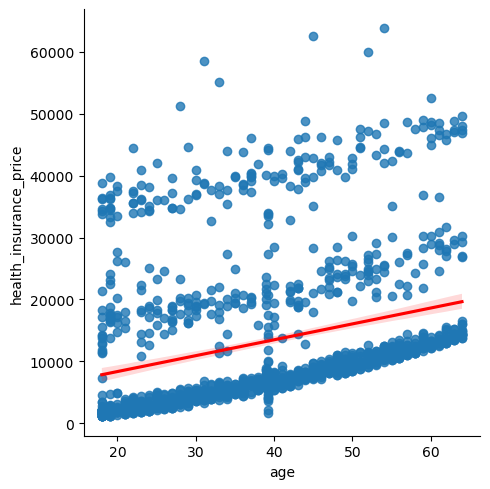

In [26]:
sns.lmplot(data=health_dataset,x="age",y="health_insurance_price", line_kws={"color": "red"})
plt.show()

The scatterplot clearly reveals that as age increases, insurance prices also rise.

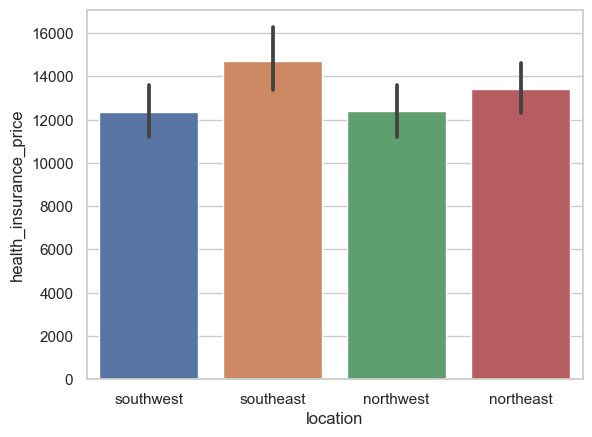

In [27]:
sns.set(style="whitegrid")
sns.barplot(x="location",y="health_insurance_price",data=health_dataset)
plt.show()

The data visual clearly shows that In the southeastern region, insurance prices are notably higher, with the northeast closely following in second place.

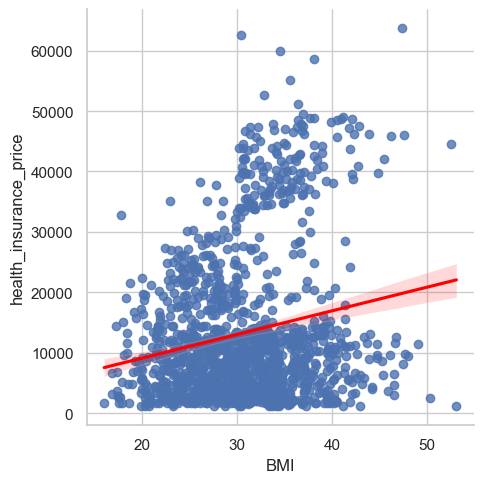

In [28]:
sns.lmplot(data=health_dataset,x="BMI",y="health_insurance_price",line_kws={"color": "red"})
plt.show()

From the scatterplot graph, it's clear that as BMI increases, health insurance prices also increases.

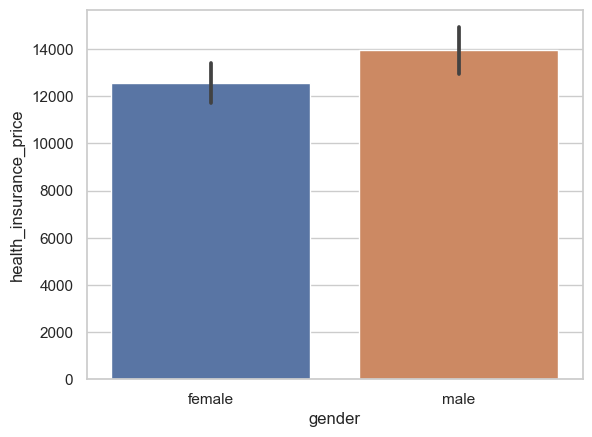

In [29]:
sns.barplot(x="gender",y="health_insurance_price",data=health_dataset)
plt.show()

This bar graph illustrates that male customers pay higher insurance prices compared to their female counterparts.

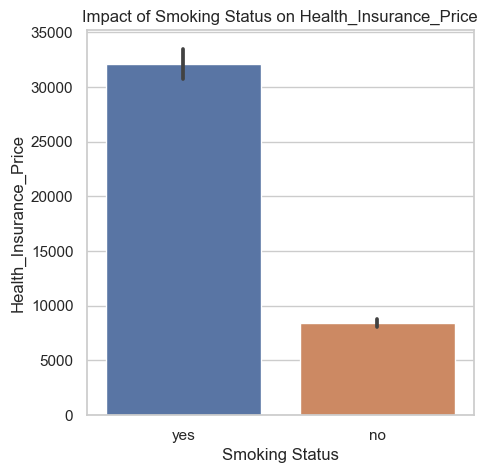

In [30]:
plt.figure(figsize=(5, 5))
sns.barplot(x="smoking_status",y="health_insurance_price",data=health_dataset)
plt.xlabel('Smoking Status')
plt.ylabel('Health_Insurance_Price')
plt.title('Impact of Smoking Status on Health_Insurance_Price')
plt.show()

This graph effectively demonstrates that individuals who smoke tend to experience significantly higher health insurance prices.
Smoking is widely recognized for its adverse health effects, leading to insurance companies charging higher premiums to account for the increased health risks associated with this habit.
This observation underscores the strong link between smoking and elevated insurance costs.

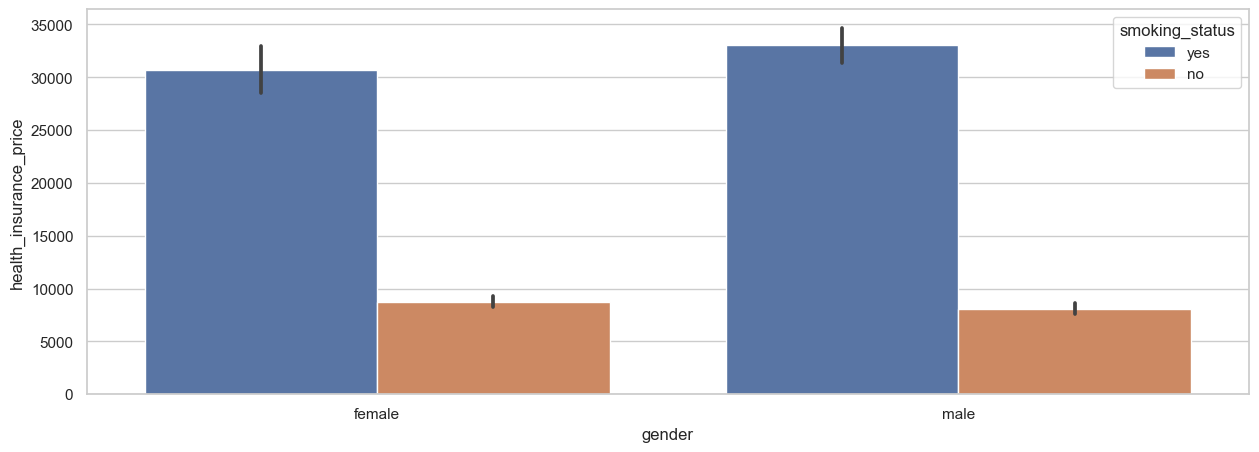

In [31]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.barplot(x="gender",y="health_insurance_price",data=health_dataset,hue="smoking_status")
plt.show()

This visual also makes it clear that both males and females who smoke tend to have higher insurance prices, 
while those who are non-smokers generally receive much lower insurance prices. 
The data emphasizes the influence of smoking habits on insurance costs for both genders.

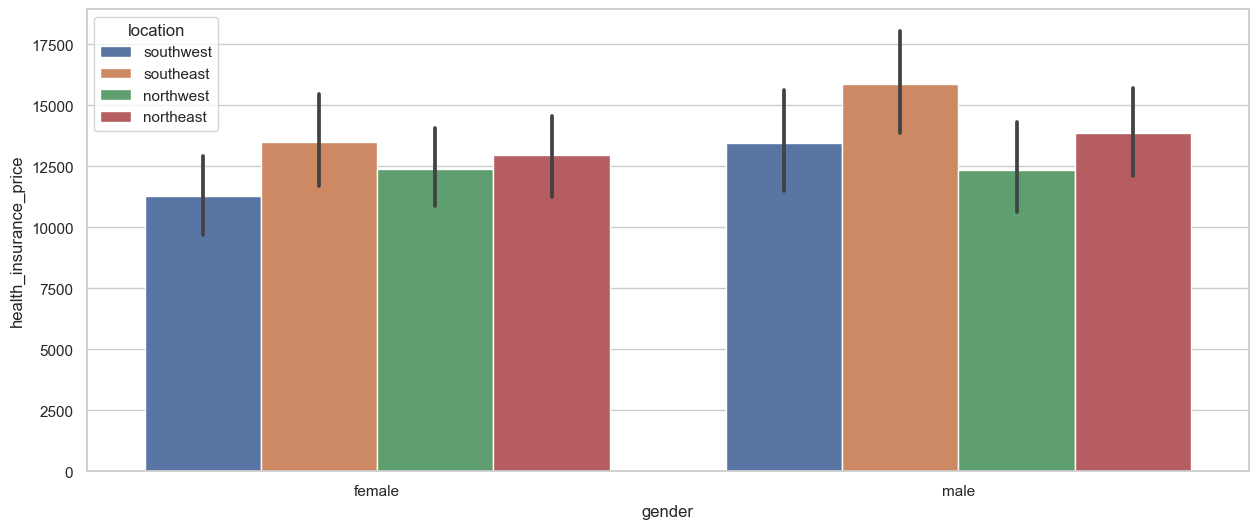

In [32]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")  # Optional style adjustment
sns.barplot(data=health_dataset, x='gender', y='health_insurance_price', hue='location')
plt.show()

The barplot highlights that both males and females residing in the southeast region generally experience 
the highest insurance prices, 
followed closely by those in the northeast.

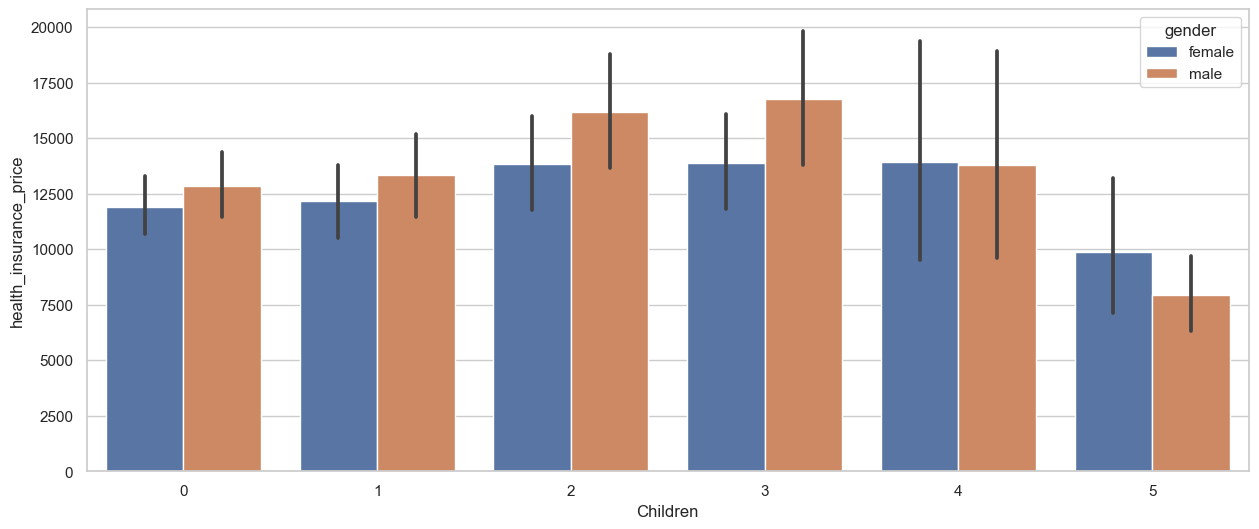

In [33]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")  # Optional style adjustment
sns.barplot(data=health_dataset, x='Children', y='health_insurance_price', hue='gender')
plt.show()

From the graph, it's evident that both in males and females, 
those with 2 to 3 or 4  children in their families tend to have higher insurance prices. 

<Axes: xlabel='health_insurance_price', ylabel='Count'>

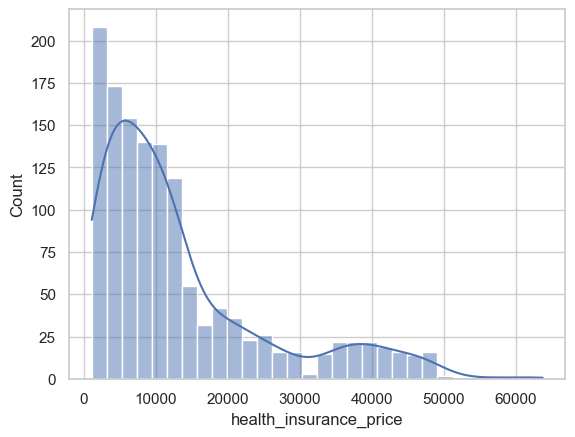

In [88]:
sns.histplot(health_dataset["health_insurance_price"],kde=True)

In [89]:
health_dataset["health_insurance_price"]=np.log(health_dataset["health_insurance_price"])

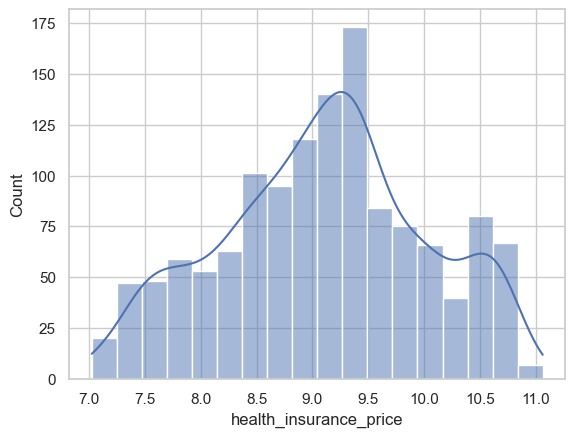

In [90]:
sns.histplot(health_dataset["health_insurance_price"],kde=True)
plt.show()

The 'Health Insurance Price' column had outliers, so I removed them by applying a log transform.

In [34]:
health_dataset.corr()

,age,BMI,Children,health_insurance_price
age,1.000000,0.108651,0.040745,0.294547
BMI,0.108651,1.000000,0.010458,0.195195
Children,0.040745,0.010458,1.000000,0.067483
health_insurance_price,0.294547,0.195195,0.067483,1.000000


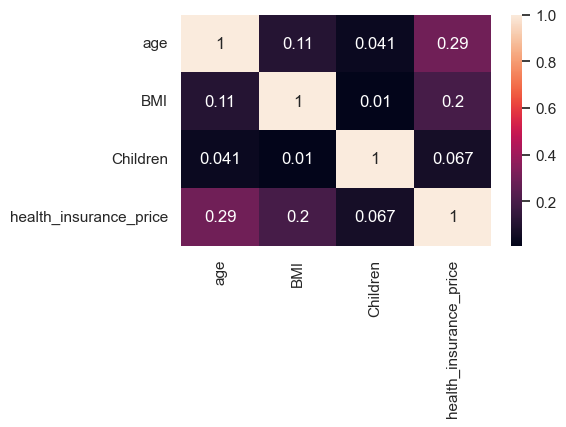

In [35]:
plt.figure(figsize=(5,3))
sns.heatmap(health_dataset.corr(),annot=True)
plt.show()

From this heatmap, it's evident that there is a strong correlation between "Age" and "Health Insurance Price".

**Data preprocessing**

**Encoding the categorical variables**

In [36]:
# label encoding for  categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["gender", "location", "smoking_status"]:
    health_dataset[col] = LabelEncoder().fit_transform(health_dataset[col])

In [37]:
health_dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.638217,0,1,3,16884.92400
1,18.0,1,33.770000,1,0,2,1725.55230
2,28.0,1,33.000000,3,0,2,4449.46200
3,33.0,1,22.705000,0,0,1,21984.47061
4,32.0,1,28.880000,0,0,1,3866.85520


Here, I encoded all categorical variables into numerical variables using label encoding.

In [38]:
health_dataset.shape

(1336, 7)

***splitting the data***

In [39]:
# matrix of features/independent variables
x=health_dataset.drop(columns="health_insurance_price")
x

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.638217,0,1,3
1,18.0,1,33.770000,1,0,2
2,28.0,1,33.000000,3,0,2
3,33.0,1,22.705000,0,0,1
4,32.0,1,28.880000,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970000,3,0,1
1334,18.0,0,31.920000,0,0,0
1335,18.0,0,36.850000,0,0,2
1336,21.0,0,25.800000,0,0,3


In [40]:
# target / dependent variable
y=health_dataset["health_insurance_price"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64


**Splitting the data into Training data & Testing Data**

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train.shape

(1068, 6)

In [43]:
y_train.shape

(1068,)

In [44]:
x_test.shape

(268, 6)

In [45]:
x_test.shape

(268, 6)

**Feature Scaling**

In [46]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [47]:
x_train

array([[ 0.64674434,  1.0075189 ,  1.60031033,  0.73473682,  2.02131499,
        -0.47790653],
       [-0.50324202, -0.99253721, -0.14999271, -0.92952388, -0.49472744,
        -0.47790653],
       [-0.21574543,  1.0075189 ,  0.73323962, -0.09739353,  2.02131499,
         0.4222772 ],
       ...,
       [ 0.07175116,  1.0075189 , -0.90231595, -0.92952388, -0.49472744,
         0.4222772 ],
       [-1.43760593,  1.0075189 ,  0.78657295, -0.92952388, -0.49472744,
        -0.47790653],
       [-0.43136787, -0.99253721, -1.9657503 , -0.09739353, -0.49472744,
         1.32246093]])

In [48]:
x_test

array([[-0.86261275,  1.0075189 , -0.05867958,  1.56686717, -0.49472744,
         1.32246093],
       [-0.07199713, -0.99253721, -0.54918463, -0.09739353, -0.49472744,
        -1.37809027],
       [-1.22198349, -0.99253721, -0.04251796, -0.92952388,  2.02131499,
        -0.47790653],
       ...,
       [-1.50948008,  1.0075189 ,  0.60879517, -0.92952388, -0.49472744,
         0.4222772 ],
       [-1.15010934, -0.99253721,  0.97081537,  0.73473682,  2.02131499,
        -1.37809027],
       [ 1.29361166,  1.0075189 ,  1.56879517, -0.92952388, -0.49472744,
         0.4222772 ]])

**model building**

**Linear Regression**

In [49]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics


In [50]:
regressor_lr=LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=regressor_lr.predict(x_test)

In [52]:
print("r2_score of linear regression is :",r2_score(y_test,y_pred))

r2_score of linear regression is : 0.7940016113817467


In [53]:
# adjusted_r2=1-((1-r2)*(N-1)/(N-p-1))
regressor_lr=r2_score(y_test,y_pred)
N=x_test.shape[0]
p=x_test.shape[1]
print("Adjusted_r2 score : ",(1-((1-regressor_lr)*(N-1)/(N-p-1))))

Adjusted_r2 score :  0.7892660162410973


In [54]:
print("mse of linear regression is : " ,mean_squared_error(y_test,y_pred))
print("mae of linear regression is : " ,mean_absolute_error(y_test,y_pred))

mse of linear regression is :  33132048.536391687
mae of linear regression is :  4038.9727916832826


**Random Forest Regression**

In [55]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
y_pred=regressor_rf.predict(x_test)

In [57]:
print("r2_score of random forest regressor is : ",r2_score(y_test,y_pred))

r2_score of random forest regressor is :  0.8759129430334845


In [58]:
# adjusted_r2=1-((1-r2)*(N-1)/(N-p-1))
regressor_rf=r2_score(y_test,y_pred)
N=x_test.shape[0]
p=x_test.shape[1]
print("Adjusted_r2 score of random forest regressor  : ",(1-((1-regressor_rf)*(N-1)/(N-p-1))))

Adjusted_r2 score of random forest regressor  :  0.8730603670112658


In [59]:
print("mse of random forest regressor  is : " ,mean_squared_error(y_test,y_pred))
print("mae of random forest regressor is : " ,mean_absolute_error(y_test,y_pred))

mse of random forest regressor  is :  19957721.134272475
mae of random forest regressor is :  2812.2629931355395


**XGBoost**

In [60]:
# xg boost regression

from xgboost import XGBRFRegressor
regressor_xgb=XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [61]:
y_pred=regressor_xgb.predict(x_test)

In [62]:
print("r2_score of xg boost is :",r2_score(y_test,y_pred))

r2_score of xg boost is : 0.9045421064769261


In [63]:
# adjusted_r2=1-((1-r2)*(N-1)/(N-p-1))
regressor_xgb=r2_score(y_test,y_pred)
N=x_test.shape[0]
p=x_test.shape[1]
print("Adjusted_r2 score of xg boost is : ",(1-((1-regressor_xgb)*(N-1)/(N-p-1))))

Adjusted_r2 score of xg boost is :  0.9023476721430623


In [64]:
print("mse of xg boost is : " ,mean_squared_error(y_test,y_pred))
print("mae of xg boost is : " ,mean_absolute_error(y_test,y_pred))

mse of xg boost is :  15353108.257799001
mae of xg boost is :  2419.7820789697994


**support vector regression**

In [65]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

In [66]:
y_pred=regressor.predict(x_test)

In [67]:
print(" r2_score of SVR is :",r2_score(y_test,y_pred))

 r2_score of SVR is : -0.13622675531201245


In [68]:
# adjusted_r2=1-((1-r2)*(N-1)/(N-p-1))
regressor=r2_score(y_test,y_pred)
N=x_test.shape[0]
p=x_test.shape[1]
print("Adjusted_r2 score of SVR is : ",(1-((1-regressor)*(N-1)/(N-p-1))))

Adjusted_r2 score of SVR is :  -0.1623469106065416


In [69]:
print("mse of svr is : " ,mean_squared_error(y_test,y_pred))
print("mae of SVR is : " ,mean_absolute_error(y_test,y_pred))

mse of svr is :  182746672.2329919
mae of SVR is :  8971.383895170584


Here, we performed 4 different models to check which model seems to give a better accuracy.

XG Boost model may be the best model in this scenario to predict the health_insurance_price.  